# Loan Default
You need to estimate the amount of credit you could grant to the customer or reject the application
Hence you need to predict if the customer will default or not.

### Import the dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/teresazhang/Documents/NTU/Y3S1/BC3409/Assignment/Credit card default I.csv")

In [3]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,1,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
df = df.drop(columns=["ID"])

### Check for null values

In [5]:
df.isnull().any()

LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
dtype: bool

In [6]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603700,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489136,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Data Visualisation

<AxesSubplot:>

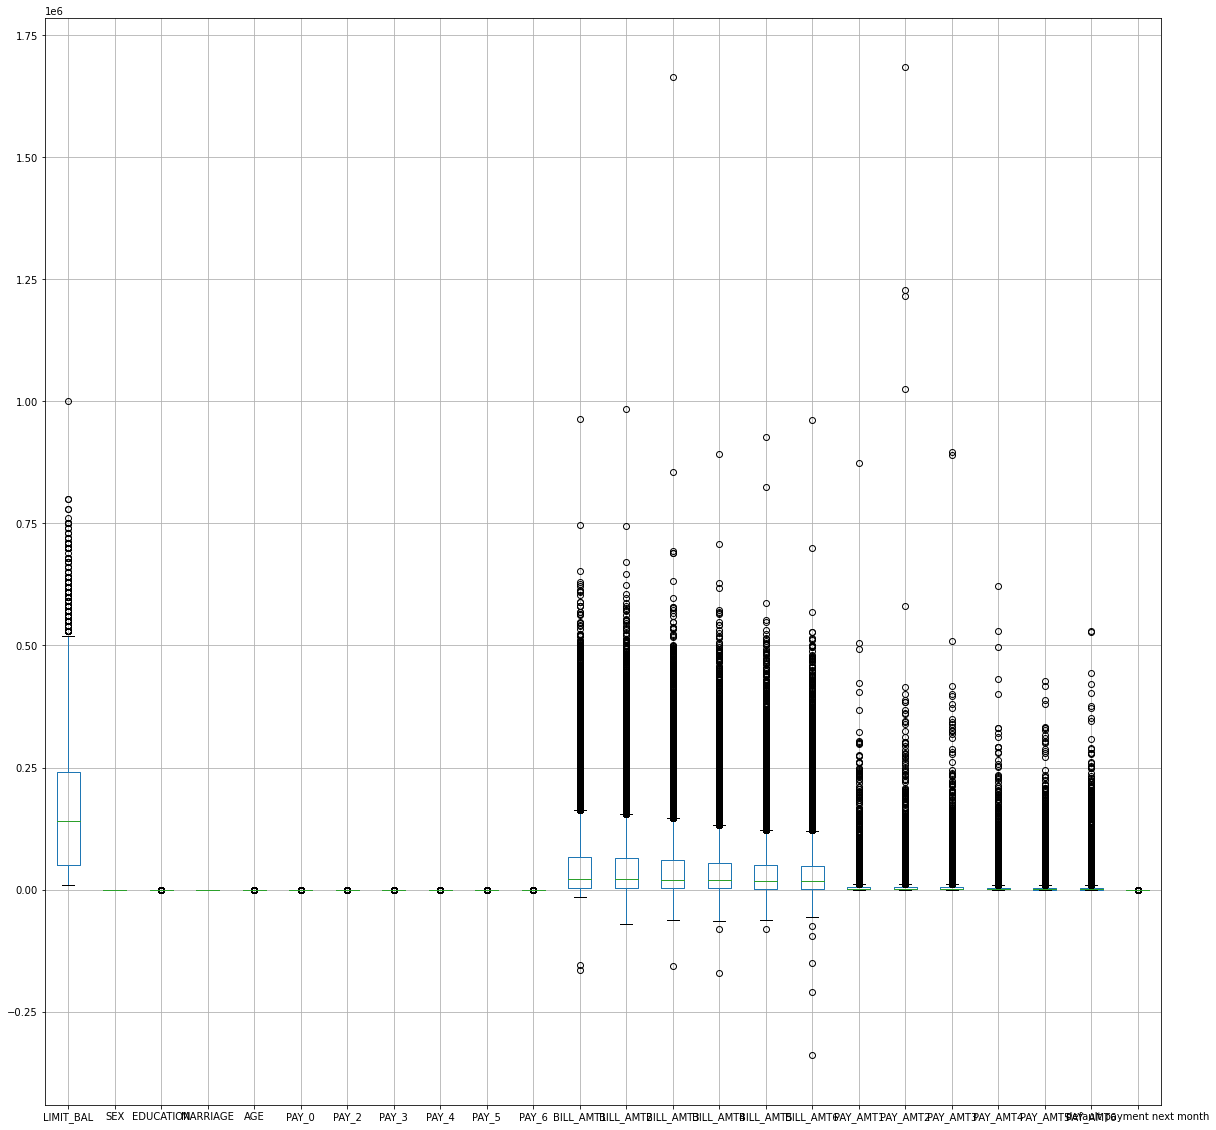

In [7]:
df.boxplot(figsize=(20,20))

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'SEX'}>,
        <AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'MARRIAGE'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'PAY_0'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>,
        <AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>],
       [<AxesSubplot:title={'center':'PAY_6'}>,
        <AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>,
        <AxesSubplot:title={'center':'BILL_AMT4'}>],
       [<AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>,
        <AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}

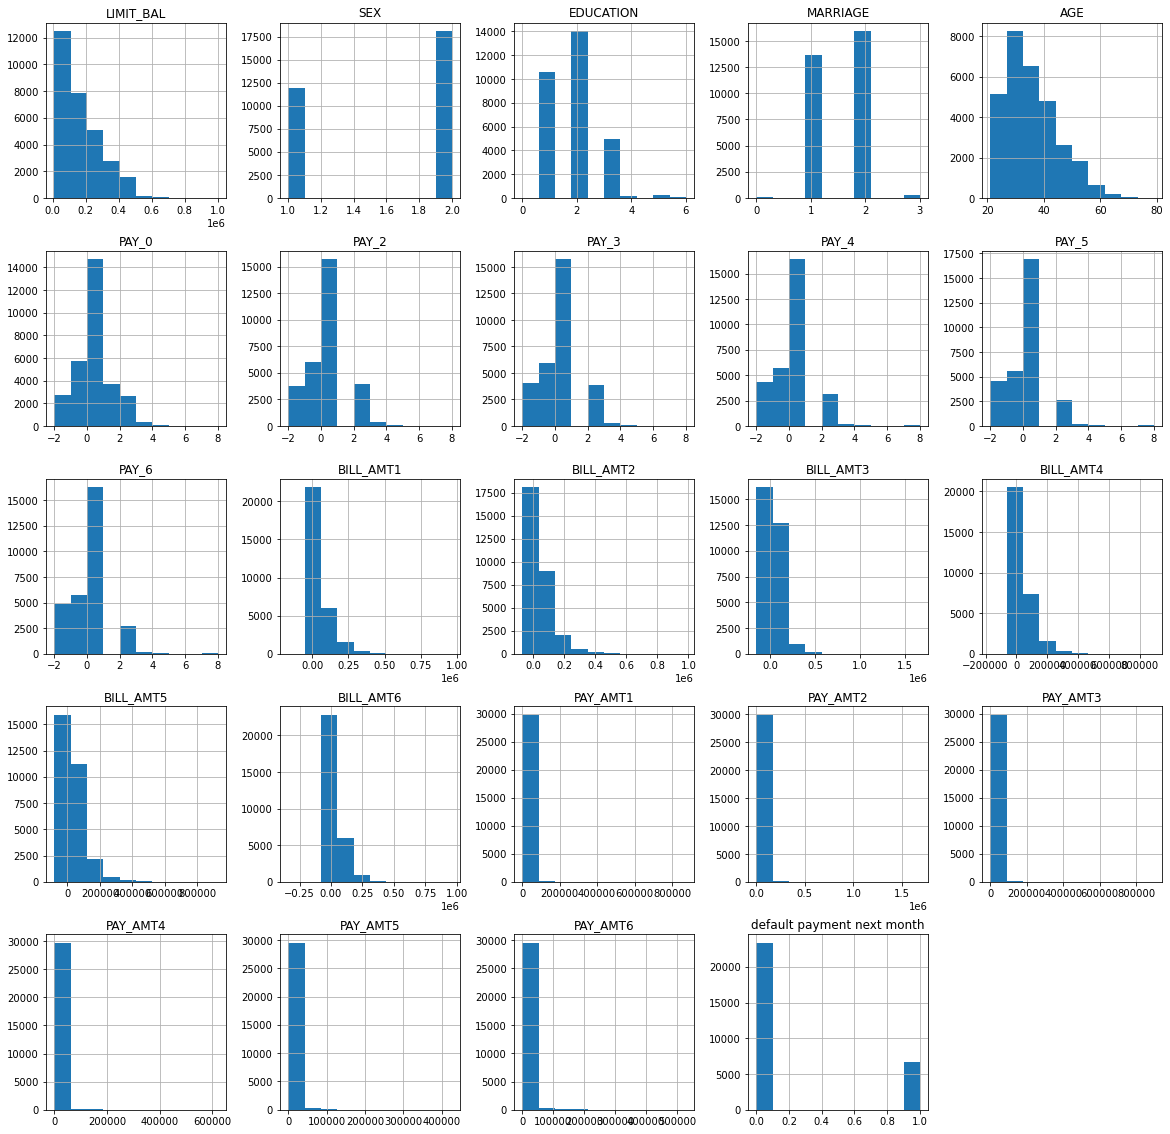

In [8]:
df.hist(figsize=(20,20))

In [9]:
import seaborn as sns

In [10]:
df.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,0.024832,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024832,1.000000,0.014219,-0.031316,-0.090787,-0.057764,-0.070891,-0.066048,-0.060127,-0.054959,...,-0.021834,-0.016960,-0.016688,-0.000219,-0.001375,-0.008576,-0.002208,-0.001646,-0.002746,-0.040088
EDUCATION,-0.219161,0.014219,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031316,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090787,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057764,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070891,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066048,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060127,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.054959,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


<AxesSubplot:>

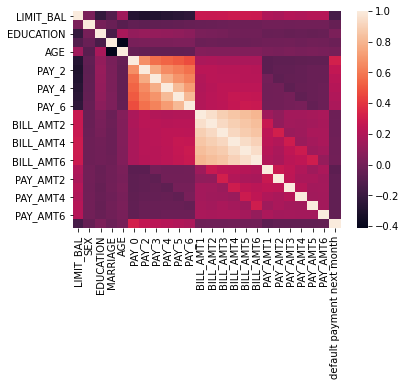

In [11]:
sns.heatmap(df.corr())

In [12]:
import matplotlib.pyplot as plt

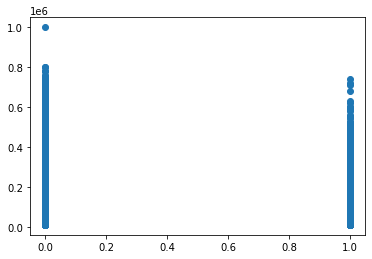

In [13]:
plt.scatter(df["default payment next month"], df["LIMIT_BAL"])

### Creating dummy variables on categorical input

In [14]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,1,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [15]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [16]:
df_dc = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

### Split into train test

In [17]:
X = df_dc.drop(columns=["default payment next month"])
Y = df_dc["default payment next month"]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

In [20]:
Y_train.value_counts()
#don't need to oversample

0    17532
1     4968
Name: default payment next month, dtype: int64

In [21]:
X_train

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
26340,150000,26,65421,69087,63156,57147,53383,48556,4850,2000,...,0,0,1,0,0,0,0,0,0,0
3877,50000,23,47662,41023,42162,6765,19286,9558,2000,2102,...,0,0,1,0,0,0,0,0,0,0
27081,80000,31,73414,69998,72368,77505,78845,74182,3000,3500,...,0,0,1,0,0,0,0,0,0,0
5440,120000,39,22033,24067,24372,24670,25617,26535,2400,1000,...,0,0,1,0,0,0,0,0,0,0
22164,150000,30,6043,50,6527,2168,-7,1373,0,8589,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17289,170000,40,179399,41265,20619,19520,5200,0,0,2000,...,0,0,1,0,0,0,0,0,0,0
5192,330000,41,4122,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12172,50000,22,49551,42517,35458,19778,19929,19790,1707,1321,...,0,0,1,0,0,0,0,0,0,0
235,80000,35,7988,3977,6848,1719,1378,19942,3983,6853,...,0,1,0,0,0,0,0,0,0,0


### Normalize data

In [22]:
from scipy import stats

In [23]:
X_train["LIMIT_BAL"] = stats.zscore(X_train["LIMIT_BAL"])
X_train["AGE"] = stats.zscore(X_train["AGE"])
X_train["BILL_AMT1"] = stats.zscore(X_train["BILL_AMT1"])
X_train["BILL_AMT2"] = stats.zscore(X_train["BILL_AMT2"])
X_train["BILL_AMT3"] = stats.zscore(X_train["BILL_AMT3"])
X_train["BILL_AMT4"] = stats.zscore(X_train["BILL_AMT4"])
X_train["BILL_AMT5"] = stats.zscore(X_train["BILL_AMT5"])
X_train["BILL_AMT6"] = stats.zscore(X_train["BILL_AMT6"])
X_train["PAY_AMT1"] = stats.zscore(X_train["PAY_AMT1"])
X_train["PAY_AMT2"] = stats.zscore(X_train["PAY_AMT2"])
X_train["PAY_AMT3"] = stats.zscore(X_train["PAY_AMT3"])
X_train["PAY_AMT4"] = stats.zscore(X_train["PAY_AMT4"])
X_train["PAY_AMT5"] = stats.zscore(X_train["PAY_AMT5"])
X_train["PAY_AMT6"] = stats.zscore(X_train["PAY_AMT6"])

In [24]:
X_test["LIMIT_BAL"] = stats.zscore(X_test["LIMIT_BAL"])
X_test["AGE"] = stats.zscore(X_test["AGE"])
X_test["BILL_AMT1"] = stats.zscore(X_test["BILL_AMT1"])
X_test["BILL_AMT2"] = stats.zscore(X_test["BILL_AMT2"])
X_test["BILL_AMT3"] = stats.zscore(X_test["BILL_AMT3"])
X_test["BILL_AMT4"] = stats.zscore(X_test["BILL_AMT4"])
X_test["BILL_AMT5"] = stats.zscore(X_test["BILL_AMT5"])
X_test["BILL_AMT6"] = stats.zscore(X_test["BILL_AMT6"])
X_test["PAY_AMT1"] = stats.zscore(X_test["PAY_AMT1"])
X_test["PAY_AMT2"] = stats.zscore(X_test["PAY_AMT2"])
X_test["PAY_AMT3"] = stats.zscore(X_test["PAY_AMT3"])
X_test["PAY_AMT4"] = stats.zscore(X_test["PAY_AMT4"])
X_test["PAY_AMT5"] = stats.zscore(X_test["PAY_AMT5"])
X_test["PAY_AMT6"] = stats.zscore(X_test["PAY_AMT6"])

## Machine Learning

In [25]:
accuracy_df = pd.DataFrame({})
fnr_df = pd.DataFrame({})

### Logistic Regression

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn import linear_model

In [27]:
model = linear_model.LogisticRegression(random_state=1)
model.fit(X_train,Y_train)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [28]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)

<AxesSubplot:>

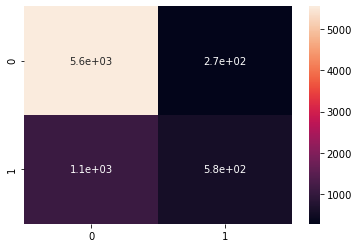

In [29]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [30]:
accuracy = (cm[0,0]+cm[1,1])/(sum(sum(cm)))
fnr = cm[0,1]/(cm[0,0]+cm[0,1])
accuracy_df.insert(0, 'Logistic Regression (Normal)', [accuracy])
fnr_df.insert(0, 'Logistic Regression (Normal)', [fnr])
print("Accuracy for Logistic Regression:",accuracy)
print("False negative rate for Logistic Regression:",fnr)

Accuracy for Logistic Regression: 0.8178666666666666
False negative rate for Logistic Regression: 0.04698216735253772


In [31]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


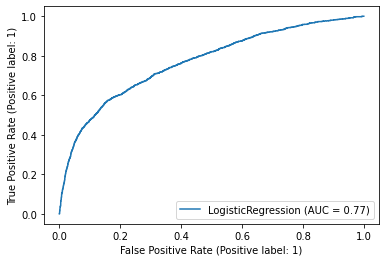

In [32]:
plot_roc_curve(model,X_test,Y_test)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


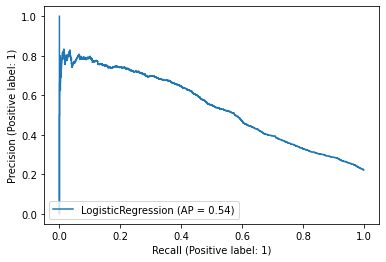

In [33]:
plot_precision_recall_curve(model,X_test,Y_test)

### Decision Tree

In [34]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=1)
model.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=1)

In [35]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)

<AxesSubplot:>

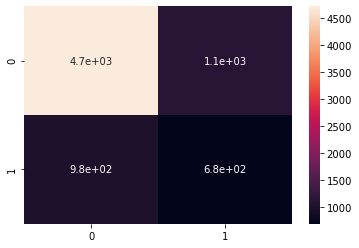

In [36]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [37]:
accuracy = (cm[0,0]+cm[1,1])/(sum(sum(cm)))
fnr = cm[0,1]/(cm[0,0]+cm[0,1])
accuracy_df.insert(1, 'Decision Tree', [accuracy])
fnr_df.insert(1, 'Decision Tree', [fnr])
print("Accuracy for Decision Tree:",accuracy)
print("False negative rate for Decision Tree:",fnr)

Accuracy for Decision Tree: 0.7206666666666667
False negative rate for Decision Tree: 0.19032921810699588


/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


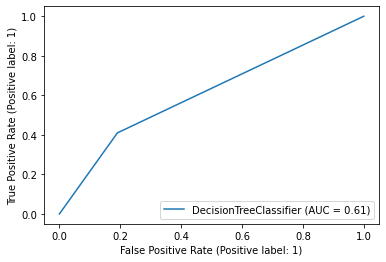

In [38]:
plot_roc_curve(model,X_test,Y_test)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


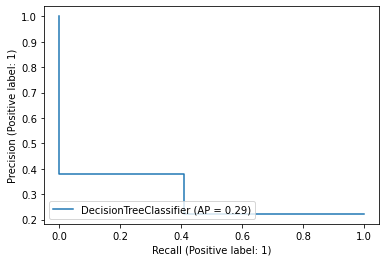

In [39]:
plot_precision_recall_curve(model,X_test,Y_test)

#### Use Grid

In [40]:
from sklearn.model_selection import GridSearchCV

model = tree.DecisionTreeClassifier()
grid = GridSearchCV(estimator = model, param_grid = dict(max_depth = [i for i in range(1, 20)]),cv=10)
grid = grid.fit(X_train, Y_train)
grid.best_params_
grid.best_score_

0.8186222222222224

### Random Forest

In [41]:
from sklearn import ensemble
model = ensemble.RandomForestClassifier(random_state=1)
model.fit(X_train,Y_train)

RandomForestClassifier(random_state=1)

In [42]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)

<AxesSubplot:>

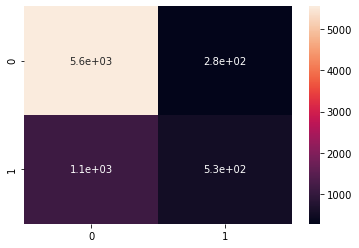

In [43]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [44]:
accuracy = (cm[0,0]+cm[1,1])/(sum(sum(cm)))
fnr = cm[0,1]/(cm[0,0]+cm[0,1])
accuracy_df.insert(2, 'Random Forest', [accuracy])
fnr_df.insert(2, 'Random Forest', [fnr])
print("Accuracy for Random Forest:",accuracy)
print("False negative rate for Random Forest:",fnr)

Accuracy for Random Forest: 0.8113333333333334
False negative rate for Random Forest: 0.04818244170096022


/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


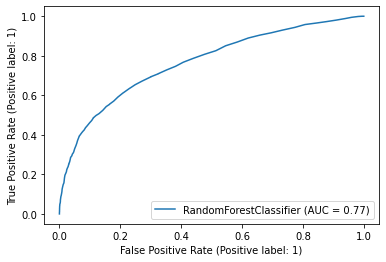

In [45]:
plot_roc_curve(model,X_test,Y_test)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


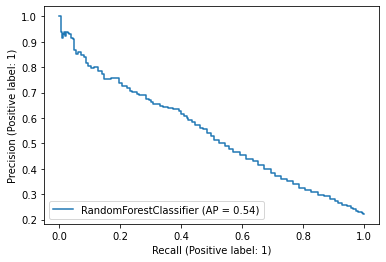

In [46]:
plot_precision_recall_curve(model,X_test,Y_test)

### Gradient Boosting

In [47]:
model = ensemble.GradientBoostingClassifier(random_state=1)
model.fit(X_train,Y_train)

GradientBoostingClassifier(random_state=1)

In [48]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)

<AxesSubplot:>

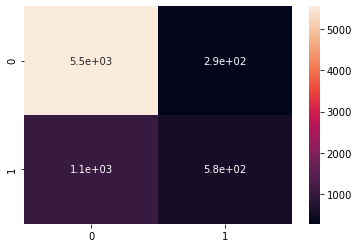

In [49]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [50]:
accuracy = (cm[0,0]+cm[1,1])/(sum(sum(cm)))
fnr = cm[0,1]/(cm[0,0]+cm[0,1])
accuracy_df.insert(3, 'Gradient Boosting', [accuracy])
fnr_df.insert(3, 'Gradient Boosting', [fnr])
print("Accuracy for Gradient Boosting:",accuracy)
print("False negative rate for Gradient Boosting:",fnr)

Accuracy for Gradient Boosting: 0.8169333333333333
False negative rate for Gradient Boosting: 0.04972565157750343


/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


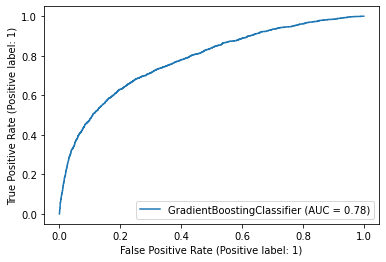

In [51]:
plot_roc_curve(model,X_test,Y_test)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


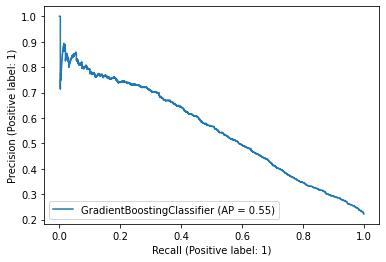

In [52]:
plot_precision_recall_curve(model,X_test,Y_test)

### Neural Network

In [53]:
from sklearn import neural_network
model = neural_network.MLPClassifier(random_state=1)
model.fit(X_train,Y_train)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=1)

In [54]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)

<AxesSubplot:>

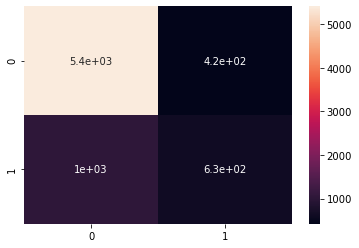

In [55]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [56]:
accuracy = (cm[0,0]+cm[1,1])/(sum(sum(cm)))
fnr = cm[0,1]/(cm[0,0]+cm[0,1])
accuracy_df.insert(4, 'Neural Network', [accuracy])
fnr_df.insert(4, 'Neural Network', [fnr])
print("Accuracy for Neural Network:",accuracy)
print("False negative rate for Neural Network:",fnr)

Accuracy for Neural Network: 0.806
False negative rate for Neural Network: 0.07184499314128943


/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


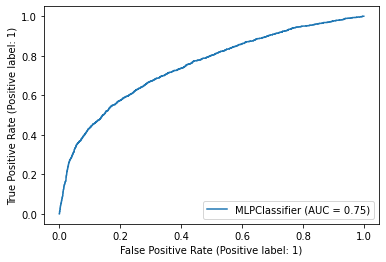

In [57]:
plot_roc_curve(model,X_test,Y_test)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


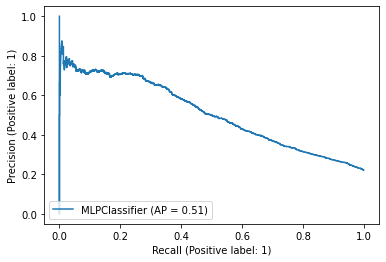

In [58]:
plot_precision_recall_curve(model,X_test,Y_test)

### Keras

In [59]:
import random
random.seed(1)

import numpy
numpy.random.seed(1)

import tensorflow as tf
tf.random.set_seed(1)

from keras.models import Sequential
from keras.layers import Dense,Dropout

In [60]:
model = Sequential()

In [61]:
model.add(Dense(61,input_dim=91,activation='relu'))
model.add(Dropout(0.1))

In [62]:
model.add(Dense(61,activation='relu'))
model.add(Dropout(0.1))

In [63]:
model.add(Dense(1,activation="sigmoid"))

In [64]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [65]:
b = 5
h = model.fit(X_train,Y_train,batch_size=b,epochs=10)

Epoch 1/10
4500/4500 [==============================] - 5s 1ms/step - loss: 0.4460 - accuracy: 0.8165
Epoch 2/10
4500/4500 [==============================] - 5s 1ms/step - loss: 0.4348 - accuracy: 0.8202
Epoch 3/10
4500/4500 [==============================] - 5s 1ms/step - loss: 0.4322 - accuracy: 0.8228
Epoch 4/10
4500/4500 [==============================] - 5s 1ms/step - loss: 0.4294 - accuracy: 0.8226
Epoch 5/10
4500/4500 [==============================] - 5s 1ms/step - loss: 0.4276 - accuracy: 0.8242
Epoch 6/10
4500/4500 [==============================] - 5s 1ms/step - loss: 0.4248 - accuracy: 0.8248
Epoch 7/10
4500/4500 [==============================] - 5s 1ms/step - loss: 0.4242 - accuracy: 0.8249
Epoch 8/10
4500/4500 [==============================] - 5s 1ms/step - loss: 0.4222 - accuracy: 0.8254
Epoch 9/10
4500/4500 [==============================] - 5s 1ms/step - loss: 0.4207 - accuracy: 0.8255
Epoch 10/10
4500/4500 [==============================] - 5s 1ms/step - loss: 0.418

In [66]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Accuracy')

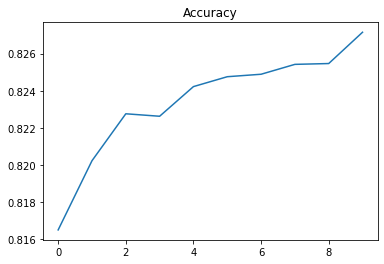

In [67]:
plt.plot(h.history["accuracy"])
plt.title("Accuracy")

Text(0.5, 1.0, 'Loss')

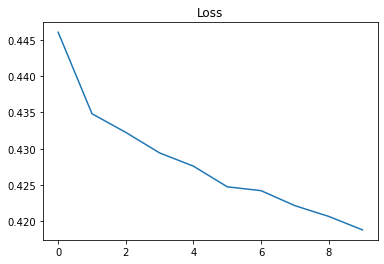

In [68]:
plt.plot(h.history["loss"])
plt.title("Loss")

In [69]:
#cannot run pred = model.predict_classes(X_test) which gives 1/0 right away, so we use this method instead
pred = model.predict(X_test)
pred = pred > 0.5
pred = pred.astype("int32")
cm = confusion_matrix(Y_test,pred)

235/235 [==============================] - 0s 887us/step


In [70]:
accuracy = (cm[0,0]+cm[1,1])/(sum(sum(cm)))
fnr = cm[0,1]/(cm[0,0]+cm[0,1])
accuracy_df.insert(5, 'Keras', [accuracy])
fnr_df.insert(5, 'Keras', [fnr])
print("Accuracy for Keras:",accuracy)
print("False negative rate for Keras:",fnr)

Accuracy for Keras: 0.8178666666666666
False negative rate for Keras: 0.04252400548696845


<AxesSubplot:>

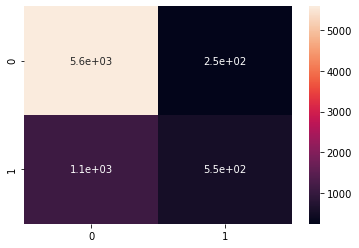

In [71]:
import seaborn as sns
sns.heatmap(cm, annot=True)

## Improving accuracy

### Feature selection

In [72]:
from sklearn.feature_selection import f_classif, SelectKBest

In [73]:
f = SelectKBest(score_func=f_classif,k=10).fit(X_train,Y_train)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [48] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [74]:
f = f.get_support()

In [75]:
f

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False])

In [76]:
X.columns[f]

Index(['LIMIT_BAL', 'PAY_0_0', 'PAY_0_2', 'PAY_0_3', 'PAY_2_0', 'PAY_2_2',
       'PAY_3_2', 'PAY_4_2', 'PAY_5_2', 'PAY_6_2'],
      dtype='object')

#### Using only LIMIT_BAL and PAY_0 to PAY_6

In [77]:
df_drop = df[['default payment next month', 'LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [78]:
df_dc = pd.get_dummies(df_drop, columns=['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

In [79]:
X = df_dc.drop(columns=['default payment next month'])
Y = df_dc['default payment next month']

In [80]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

In [81]:
X_train["LIMIT_BAL"] = stats.zscore(X_train["LIMIT_BAL"])

In [82]:
X_test["LIMIT_BAL"] = stats.zscore(X_test["LIMIT_BAL"])

### Machine Learning with feature selection

### Logistic Regression

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn import linear_model

In [84]:
model = linear_model.LogisticRegression(random_state=1)
model.fit(X_train,Y_train)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [85]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)

<AxesSubplot:>

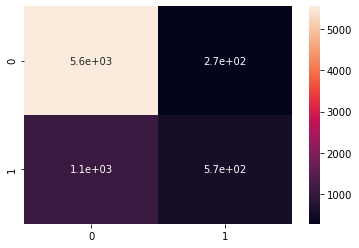

In [86]:
sns.heatmap(cm, annot=True)

In [87]:
accuracy = (cm[0,0]+cm[1,1])/(sum(sum(cm)))
fnr = cm[0,1]/(cm[0,0]+cm[0,1])
accuracy_df.insert(1, 'Logistic Regression (Feature Selection)', [accuracy])
fnr_df.insert(1, 'Logistic Regression (Feature Selection)', [fnr])
print("Accuracy for logistic regression:",(cm[0,0]+cm[1,1])/(sum(sum(cm))))
print("False negative rate for logistic regression:",cm[0,1]/(cm[0,0]+cm[0,1]))

Accuracy for logistic regression: 0.8170666666666667
False negative rate for logistic regression: 0.04698216735253772


In [88]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


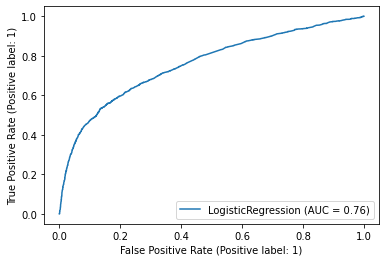

In [89]:
plot_roc_curve(model,X_test,Y_test)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


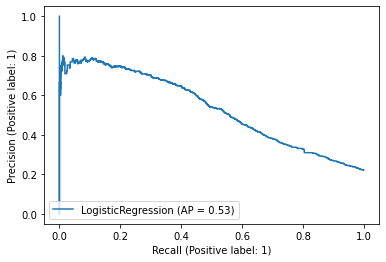

In [90]:
plot_precision_recall_curve(model,X_test,Y_test)

#### Not much changed as expected since we only dropped one variable, the accuracy increased slightly.

### Neural Network

In [91]:
from sklearn import neural_network
model = neural_network.MLPClassifier(random_state=1)
model.fit(X_train,Y_train)

MLPClassifier(random_state=1)

In [92]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)

<AxesSubplot:>

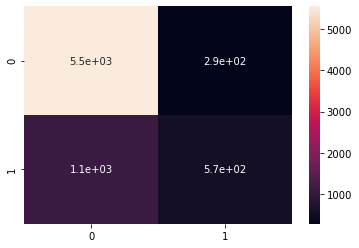

In [93]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [94]:
accuracy = (cm[0,0]+cm[1,1])/(sum(sum(cm)))
fnr = cm[0,1]/(cm[0,0]+cm[0,1])
accuracy_df.insert(5, 'Neural Network (Feature Selection)', [accuracy])
fnr_df.insert(5, 'Neural Network (Feature Selection)', [fnr])
print("Accuracy for neural network:",(cm[0,0]+cm[1,1])/(sum(sum(cm))))
print("False negative rate for neural network:",cm[0,1]/(cm[0,0]+cm[0,1]))

Accuracy for neural network: 0.8156
False negative rate for neural network: 0.04938271604938271


/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


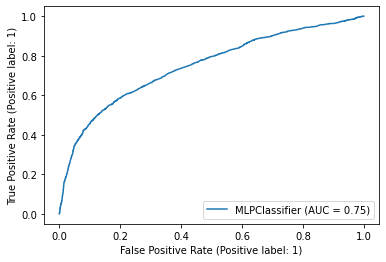

In [95]:
plot_roc_curve(model,X_test,Y_test)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


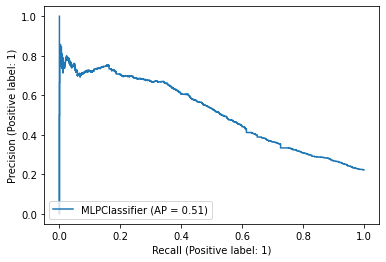

In [96]:
plot_precision_recall_curve(model,X_test,Y_test)

### Data Wrangling

### Check for duplicates

In [97]:
df.duplicated().any()

True

In [98]:
df.duplicated().sum()

35

In [99]:
df.drop_duplicates()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,1,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [100]:
df_dc = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

In [101]:
X = df_dc.drop(columns=["default payment next month"])
Y = df_dc["default payment next month"]

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

### Logistic Regression

In [104]:
from sklearn.metrics import confusion_matrix
from sklearn import linear_model

In [105]:
model = linear_model.LogisticRegression(random_state=1)
model.fit(X_train,Y_train)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [106]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)

<AxesSubplot:>

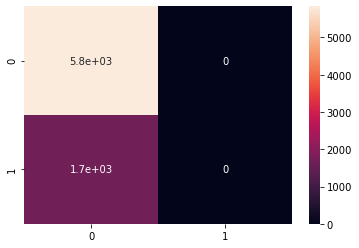

In [107]:
sns.heatmap(cm, annot=True)

In [108]:
accuracy = (cm[0,0]+cm[1,1])/(sum(sum(cm)))
fnr = cm[0,1]/(cm[0,0]+cm[0,1])
accuracy_df.insert(2, 'Logistic Regression (Data Wrangling)', [accuracy])
fnr_df.insert(2, 'Logistic Regression (Data Wrangling)', [fnr])
print("Accuracy for logistic regression:",(cm[0,0]+cm[1,1])/(sum(sum(cm))))
print("False negative rate for logistic regression:",cm[0,1]/(cm[0,0]+cm[0,1]))

Accuracy for logistic regression: 0.7776
False negative rate for logistic regression: 0.0


In [109]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


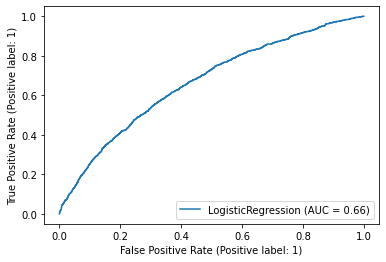

In [110]:
plot_roc_curve(model,X_test,Y_test)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


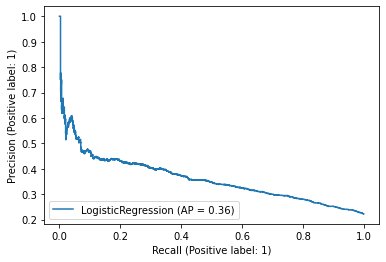

In [111]:
plot_precision_recall_curve(model,X_test,Y_test)

Trying just the logistic regression model, the accuracy decrease but the false negative rate improved.

## Analysis

### Accuracy for each model

In [112]:
accuracy_df

,Logistic Regression (Normal),Logistic Regression (Feature Selection),Logistic Regression (Data Wrangling),Decision Tree,Random Forest,Gradient Boosting,Neural Network (Feature Selection),Neural Network,Keras
0,0.817867,0.817067,0.7776,0.720667,0.811333,0.816933,0.8156,0.806,0.817867


Logistic Regression and Keras have the highest accuracy

### False Negative Rate for each model

In [113]:
fnr_df

,Logistic Regression (Normal),Logistic Regression (Feature Selection),Logistic Regression (Data Wrangling),Decision Tree,Random Forest,Gradient Boosting,Neural Network (Feature Selection),Neural Network,Keras
0,0.046982,0.046982,0.0,0.190329,0.048182,0.049726,0.049383,0.071845,0.042524


Logisitc Regression after removing the duplicated values has the lowest false negative rates.

## Pros and Cons for each model

### Logistic Regression

#### Pros
Logistic regression is easier to implement, interpret, and very efficient to train.	
It makes no assumptions about distributions of classes in feature space.
It can easily extend to multiple classes(multinomial regression) and a natural probabilistic view of class predictions.	
It not only provides a measure of how appropriate a predictor(coefficient size)is, but also its direction of association (positive or negative).	
It is very fast at classifying unknown records.	
Good accuracy for many simple data sets and it performs well when the dataset is linearly separable.	
It can interpret model coefficients as indicators of feature importance.	

#### Cons
If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting. 	
The major limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables. Non-linear problems can’t be solved with logistic regression because it has a linear decision surface. 	
Logistic Regression requires average or no multicollinearity between independent variables. 	
It can only be used to predict discrete functions. Hence, the dependent variable of Logistic Regression is bound to the discrete number set. 	
It is tough to obtain complex relationships using logistic regression. More powerful and compact algorithms such as Neural Networks can easily outperform this algorithm.	
Logistic regression is less inclined to over-fitting but it can overfit in high dimensional datasets. 	
Logistic Regression needs that independent variables are linearly related to the log odds (log(p/(1-p)).

#### How to overcome the weaknesses
Consider Regularization (L1 and L2) techniques to avoid over-fitting in high dimensional datasets for logistic regression. Normalisation is important to avoid domination of one feature. Optimize on other metrics also such as Log Loss and F1-Score. The F1-Score could be useful, in case of class imbalance. Since we oversampled the minority, there is no need to worry about this. Improve the accuracy by performing a Grid Search to tune the hyperparameters of the model.

### Decision Tree

#### Pros
To build a model which is easy to explain to people, a decision tree model will always do better than a logistic model.
Decision trees generate understandable rules, they are capable of handline both continuous and categorical variables and provide a clear indication of which fields are nost important for prediction or classification.

#### Cons
The process of growing a decision tree is computationally expensive. At each node, each candidate splitting field must be sorted before its split can be found. And there is a problem with overfitting.

#### How to overcome the weaknesses
Prune the tree so that there is no overfitting. Use random forest or gradient boosting for better accuracy.

### Random Forest

#### Pros
Robust to outliers.
Works well with non-linear data.
Lower risk of overfitting.
Runs efficiently on a large dataset.
Better accuracy than other classification algorithms. Bootstrap Aggregation (Bagging) is a general procedure that can be used to reduce the variance for those algorithm that have high variance.

#### Cons
Random forests are found to be biased while dealing with categorical variables. It is slow in training a model. It is not suitable for linear methods with a lot of sparse features.

#### How to overcome the weaknesses
Use less variables (those that are not important) to make training faster

### Gradient Boosting

Gradient boosting trees can be more accurate than random forests. Because we train them to correct each other’s errors, they’re capable of capturing complex patterns in the data. However, if the data are noisy, the boosted trees may overfit and start modeling the noise.

#### Pros
Lots of flexibility - can optimize on different loss functions and provides several hyper parameter tuning options that make the function fit very flexible.
No data pre-processing required - often works great with categorical and numerical values as is.
Handles missing data - imputation not required.

#### Cons
Gradient Boosting Models will continue improving to minimize all errors. This can overemphasize outliers and cause overfitting.
Computationally expensive - often require many trees (>1000) which can be time and memory exhaustive.
The high flexibility results in many parameters that interact and influence heavily the behavior of the approach (number of iterations, tree depth, regularization parameters, etc.). This requires a large grid search during tuning.
Less interpretative in nature, although this is easily addressed with various tools.

#### How to overcome the weaknesses
Use less variables (those that are not important) to make training faster

### Neural Network

#### Pros
Neural Network uses entropy instead of gini coefficient to compute errors, which mimics human nature. It results in very low predictive error (on trainset!). It can capture complex relationships by increasing number of hidden nodes and/or hidden layers. There is no need to specify a relationship between Y and Xs for neural networks. Neural networks are good to model with nonlinear data with large number of inputs; for example, images. It is reliable in an approach of tasks involving many features. It works by splitting the problem of classification into a layered network of simpler elements.
Once trained, the predictions are pretty fast.
Neural networks can be trained with any number of inputs and layers.

#### Cons
Neural networks are black boxes, meaning we cannot know how much each independent variable is influencing the dependent variables.
It is computationally very expensive and time consuming to train with traditional CPUs.
Neural networks depend a lot on training data. This leads to the problem of over-fitting and generalization. The mode relies more on the training data and may be tuned to the data.

#### How to overcome the weaknesses
Deep neural networks are prone to overfitting because they learn millions or billions of parameters while building the model. A model having this many parameters can overfit the training data because it has sufficient capacity to do so.

The basic idea to deal with the problem of overfitting is to decrease the complexity of the model. To do so, we can make the network smaller by simply removing the layers or reducing the number of neurons, etc.

### Importance of model to bank

To minimise the loss to the bank, it is important to not only look at the model with the highest accuracy, but to also look at the model with the lowest false negative rate. It is okay to not loan a customer that is not going to default (false positive), but it is a loss to the bank if it loans to a customer that is going to default and not pay back the money (false negative).